 ###  The Big 4 Agenda Twitter Sentiment Analysis

<img src="image.png" width=700>

Twitter Sentiment Analysis of Kenyans perceptions of the Big 4 Agenda using Naive Bayes Classifier and Logisitc Regression 



## We followed the following steps sequentially:

#### 1. Overview of the Problem
#### 2. Understanding the Problem Statement
#### 3. Loading the Libraries 
#### 4. Data inspection
#### 5. Data Cleaning
#### 6. Story Generation and Visualization
#### 7. Model Building Process





We were tasked to collect data from social media and use it to gauge Kenyan's attitude towards the president's Big Four in general, and the individual pillars in particular.

we were to find out sentiments towards the initiative, areas they are more or less positive about and pillars that have most and least popular.

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import time
from twitterscraper import query_tweets
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")


In [133]:
access_token = "1033758126699364353-x3BuGV7xyqRDzFGavUH6OeCj0WpsUS"
access_secret = "sZWdviYTFuVENnNvcWEyk2G34pEcMt8zdkvGhblQcLSl4"
consumer_key = "NJjaAZwo1ebDZWHTuYFv7PobW"
consumer_secret = "QHQUEYmDoiBMqk0PitkUl2BxbAKp2XEsrVpvKtmgEYr4ZlXkph"
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [134]:
#We begin searching our query
#Put your search term

searchquery = "Big4Agenda"

In [138]:
users =tw.Cursor(api.search,q=searchquery).items()
count = 0
start = 0
errorCount=0

In [110]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [111]:
#here we tell the program how fast to search 

waitquery = 150      #this is the number of searches it will do before resting
waittime = 1.0          # this is the length of time we tell our program to rest
total_number = 10000     #this is the total number of queries we want
justincase = 1         #this is the number of minutes to wait just in case twitter throttles us

In [112]:
 text = [0] * total_number
secondcount = 0
idvalues = [1] * total_number
 #1 is happy; 2 is sad; 3 is angry; 4 is fearful
#Below is where the magic happens and the queries are being made according to our desires above
while secondcount < total_number:
    try:
        user = next(users)
        count += 1
        
        #We say that after every 100 searches wait 5 seconds
        if (count%waitquery == 0):
            time.sleep(waittime)
            #break

    except tw.TweepError:
        #catches TweepError when rate limiting occurs, sleeps, then restarts.
        #nominally 15 minutes, make a bit longer to avoid attention.
        print ("sleeping")
        time.sleep(60*justincase)
        user = next(users)
        
        
    except StopIteration:
        break
    try:
        #print "Writing to JSON tweet number:"+str(count)
        text_value = user._json['text']
        language = user._json['lang']
        #print(text_value)
        print(language)
        
        if "RT" not in text_value:
            if language == "en":
                text[secondcount] = text_value
                secondcount = secondcount + 1
                print("current saved is:")
                print(secondcount)

    except UnicodeEncodeError:
        errorCount += 1
        print ("UnicodeEncodeError,errorCount =")+str(errorCount)

en
current saved is:
1
en
current saved is:
2
en
en
current saved is:
3
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
current saved is:
4
en
en
en
en
en
en
en
en
en
en
en
current saved is:
5
en
en
en
en
en
current saved is:
6
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
current saved is:
7
en
en
current saved is:
8
en
en
en
en
current saved is:
9
en
current saved is:
10
en
current saved is:
11
en
current saved is:
12
en
current saved is:
13
en
en
en
en
en
current saved is:
14
tl
en
current saved is:
15
en
en
en
en
current saved is:
16
en
en
en
current saved is:
17
en
current saved is:
18
en
en
current saved is:
19
en
en
current saved is:
20
en
current saved is:
21
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
current saved is:
22
en
en
en
en
en
current saved is:
23
en
en
current saved is:
24
en
en
en
en
current saved is:
25
en
en
en
en
en
en
en
en
en
current saved is:
26
en
current saved is:
27
en
en
en
en
current saved is:
28
en
en
en
current saved is:
29
en
c

In [113]:
print("Creating dataframe:")

d = {"text": text, "id": idvalues}
df = pd.DataFrame(data = d)

df.to_csv('big4agendatweets.csv', header=True, index=False, encoding='utf-8')

print ("completed")

Creating dataframe:
completed


In [224]:
# Loading and reading the Big 4 Agenda dataset 

df = pd.read_csv('big4agendatweets.csv')
df.head()

,text,id
0,#Turkana Haven't seen anyone transported for h...,1
1,@NAssemblyKE War on #Corruption MUST take cent...,1
2,@Data4SDGs Davis @DavisAdieno giving a brief o...,1
3,@Robb08962871 Here is what the #Big4Agenda pro...,1
4,#YesKilifi an environment that fosters dialogu...,1


### Data Preprocessing (Cleaning, Wrangling, Transformation and Munging)


In [147]:
# Coverting the non readable texts into nothing

def removetext(text):
    return ''.join([i if ord(i) < 128 else '' for i in text])

In [148]:
df['Sentiment'] = df['text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)


In [150]:
# The actual removing of the noise and texts from the data set.

df['text'] = df['text'].apply(removetext)

In [151]:
# Renaming the Text and Sentiment Columns

a=df.rename(index = str, columns={"text": "Tweet", "Sentiment": "Polarity"})
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Tweet       10000 non-null object
id          10000 non-null int64
Polarity    10000 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 312.5+ KB


In [229]:
# Tokenizing and clean up the whole set of Tweet Texts:
tc_tweets = []
for tweet in a:
    wordlist = [word for word in nltk.word_tokenize(tweet) if word not in a] #a list of words per tweet
    tc_tweets.append(wordlist)
tc_tweets[0] 

[]

In [225]:
a.head()

,Tweet,id,Polarity
0,#turkana haven't seen anyone transported for h...,1,0.10
1,@nassemblyke war on #corruption must take cent...,1,0.55
2,@data4sdgs davis @davisadieno giving a brief o...,1,0.00
3,@robb08962871 here is what the #big4agenda pro...,1,0.00
4,#yeskilifi an environment that fosters dialogu...,1,0.40


In [153]:
# Converting all the twitter texts into lower Case

a['Tweet'] = a['Tweet'].apply(lambda x: x.lower())

In [209]:
# Removing any substrings containing "http"

[re.sub(r"^.*http.*$", '', tweet) for tweet in a] 

['Tweet', 'id', 'Polarity']

In [213]:
# Removing  all the non-ASCII characters and replacing with a single space

[re.sub(r'[^\x00-\x7F]+','', tweet) for tweet in a] 

['Tweet', 'id', 'Polarity']

In [226]:
#Here I get each unique keyword from my dataframe

array = a['Tweet'].str.split(' ', expand=True).stack().value_counts()
#print(array) to see what this looks like

In [214]:
# Removing the Tweeter's RT tags

[tweet.replace('RT','') for tweet in a] 

['Tweet', 'id', 'Polarity']

In [227]:
a.head()

,Tweet,id,Polarity
0,#turkana haven't seen anyone transported for h...,1,0.10
1,@nassemblyke war on #corruption must take cent...,1,0.55
2,@data4sdgs davis @davisadieno giving a brief o...,1,0.00
3,@robb08962871 here is what the #big4agenda pro...,1,0.00
4,#yeskilifi an environment that fosters dialogu...,1,0.40


In [251]:
# Checking the  Missing Values

missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column_Name', 'Missing_Count']
missing_df = missing_df[missing_df['Missing_Count']>0]
missing_df = missing_df.sort_values(by='Missing_Count')
missing_df

,Column_Name,Missing_Count


### Visualization and basic statistics

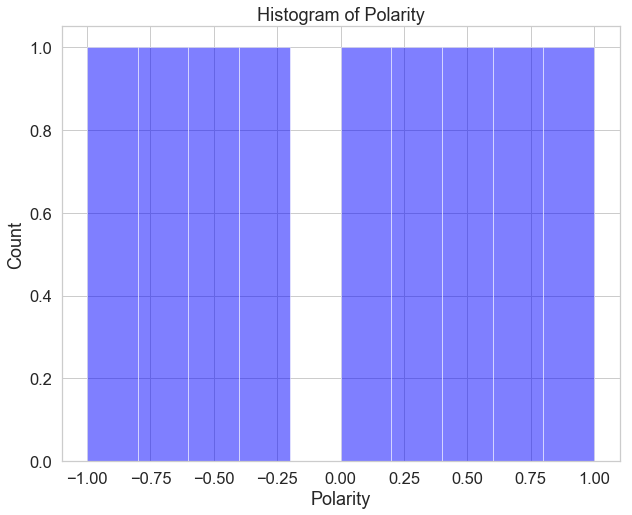

In [200]:
num_bins = 50
plt.figure(figsize=(10,8))
n, bins, patches = plt.hist([-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1], facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of Polarity')
plt.show();

In [ ]:
# Save the Cleaned Big 4 Agenda Data set

a.to_csv("cleanbig4file.csv", encoding = "ISO-8859-1")
a.columns